# Load data and import statements

In [1]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [5]:
# All import statements
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
project_path = './'
# project_path = '/content/drive/My Drive/assignments/' # For google drive

In [7]:
# Load data
data = pd.read_csv(project_path + 'parkinsons.data')
data.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

# Data analysis

It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general
idea of likely challenges in the dataset

In [8]:
#Check the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

There are 22 columns with float value, 1 column with object values which has name and 1 column as integer which is the status which is categorical column containing the true and the false values.
In total there are 24 columns.

Drop name column as not significant

In [9]:
data.drop(['name'], axis=1, inplace=True)

In [10]:
data.head()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0   0.00370   0.00554     0.01109       0.04374             0.426  ...   
1   0.00465   0.00696     0.01394       0.06134             0.626  ...   
2   0.00544   0.00781     0.01633       0.05233             0.482  ...   
3   0.00502   0.00698     0.01505       0.05492             0.517  ...   
4   0.00655   0.00908     0.01966       0.06425             0.584  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 23 columns]

# Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations

## Describe the data.
This provide the mean, stand deviation, min max and interquartile range.

In [11]:
data.describe()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...          D2         PPE
count   195.000000    195.000000  ...  195.000000  195.000000
mean    154.228641    197.104918  ...    2.381826    0.206552
std      41.390065     91.491548  ...    0.382799    0.090119
min      88.333000    102.145000  ...    1.423287    0.044539
25%     117.572000    134.862500  ...    2.099125    0.137451
50%     148.790000    175.829000  ...    2.361532    0.194052
75%     182.769000    224.205500  ...    2.636456    0.252980
max     260.105000    592.030000  ...    3.671155    0.527367

[8 rows x 23 columns]

## Finding the corelation between the fields

In [57]:
data.corr()

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...        D2       PPE
MDVP:Fo(Hz)          1.000000      0.400985  ...  0.177980 -0.372356
MDVP:Fhi(Hz)         0.400985      1.000000  ...  0.176323 -0.069543
MDVP:Flo(Hz)         0.596546      0.084951  ... -0.100629 -0.340071
MDVP:Jitter(%)      -0.118003      0.102086  ...  0.433434  0.721543
MDVP:Jitter(Abs)    -0.382027     -0.029198  ...  0.310694  0.748162
MDVP:RAP            -0.076194      0.097177  ...  0.426605  0.670999
MDVP:PPQ            -0.112165      0.091126  ...  0.412524  0.769647
Jitter:DDP          -0.076213      0.097150  ...  0.426556  0.671005
MDVP:Shimmer        -0.098374      0.002281  ...  0.507088  0.693771
MDVP:Shimmer(dB)    -0.073742      0.043465  ...  0.512233  0.695058
Shimmer:APQ3        -0.094717     -0.003743  ...  0.467265  0.645377
Shimmer:APQ5        -0.070682     -0.009997  ...  0.502174  0.702456
MDVP:APQ            -0.077774      0.004937  ...  0.536869  0.721694
Shimmer:DDA         -0.094732     -0.003733  ...  0.467261  0.645389
NHR                 -0.021981      0.163766  ...  0.470949  0.552591
HNR                  0.059144     -0.024893  ... -0.601401 -0.692876
status              -0.383535     -0.166136  ...  0.340232  0.531039
RPDE                -0.383894     -0.112404  ...  0.236931  0.545886
DFA                 -0.446013     -0.343097  ... -0.165381  0.270445
spread1             -0.413738     -0.076658  ...  0.495123  0.962435
spread2             -0.249450     -0.002954  ...  0.523532  0.644711
D2                   0.177980      0.176323  ...  1.000000  0.480585
PPE                 -0.372356     -0.069543  ...  0.480585  1.000000

[23 rows x 23 columns]

Looking at the corelation matrix we can infer that there is no strong corelation between any field with the status field.

## Doing univariate analysis of data
Plot histograph

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7d7f853278>,
      dtype=object)

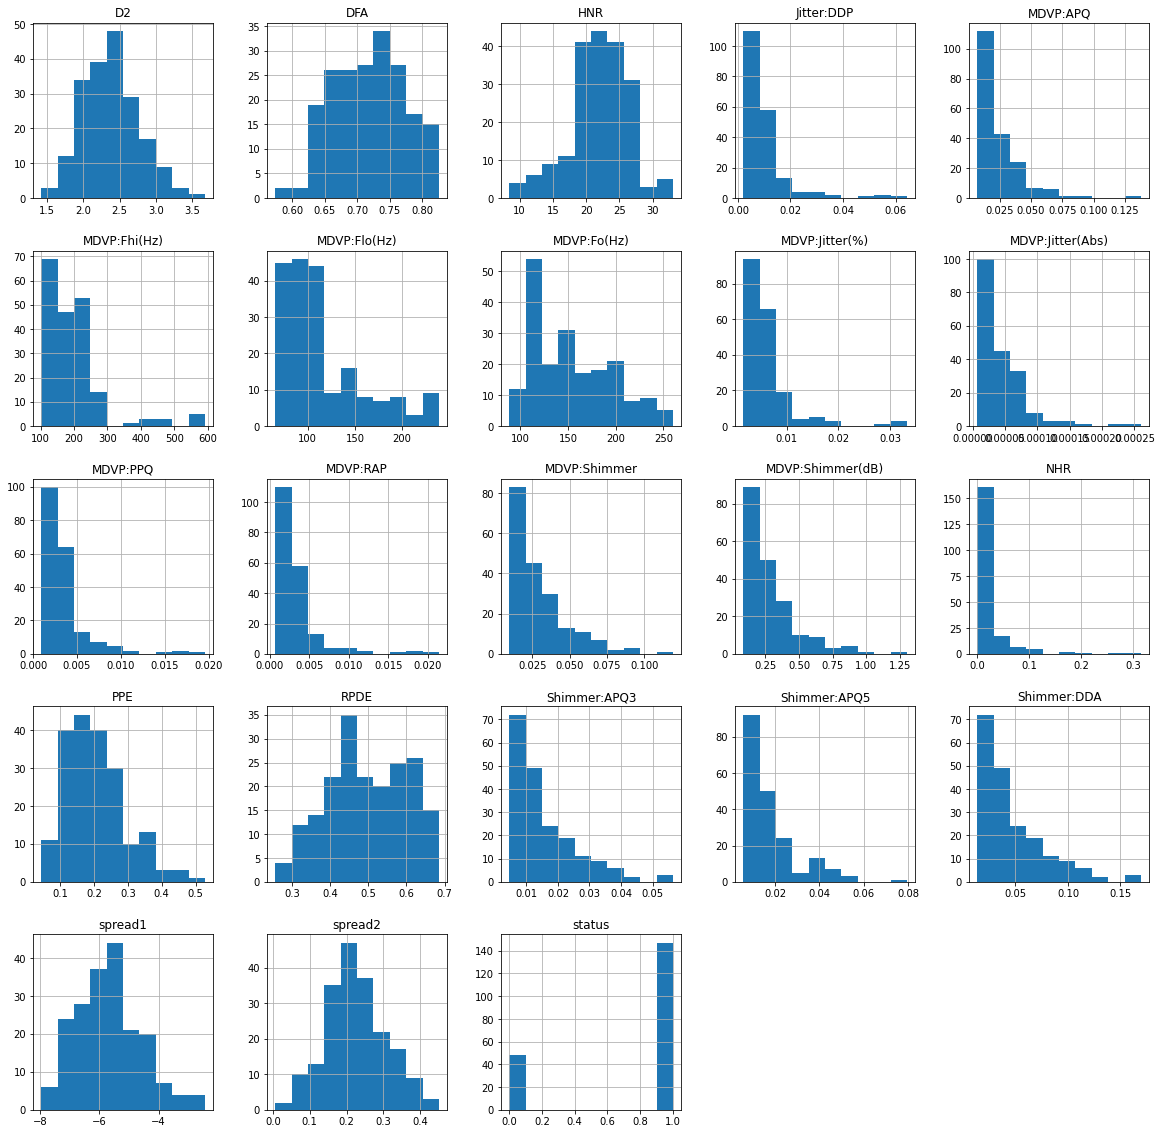

In [10]:
data.hist(figsize=(20,20))

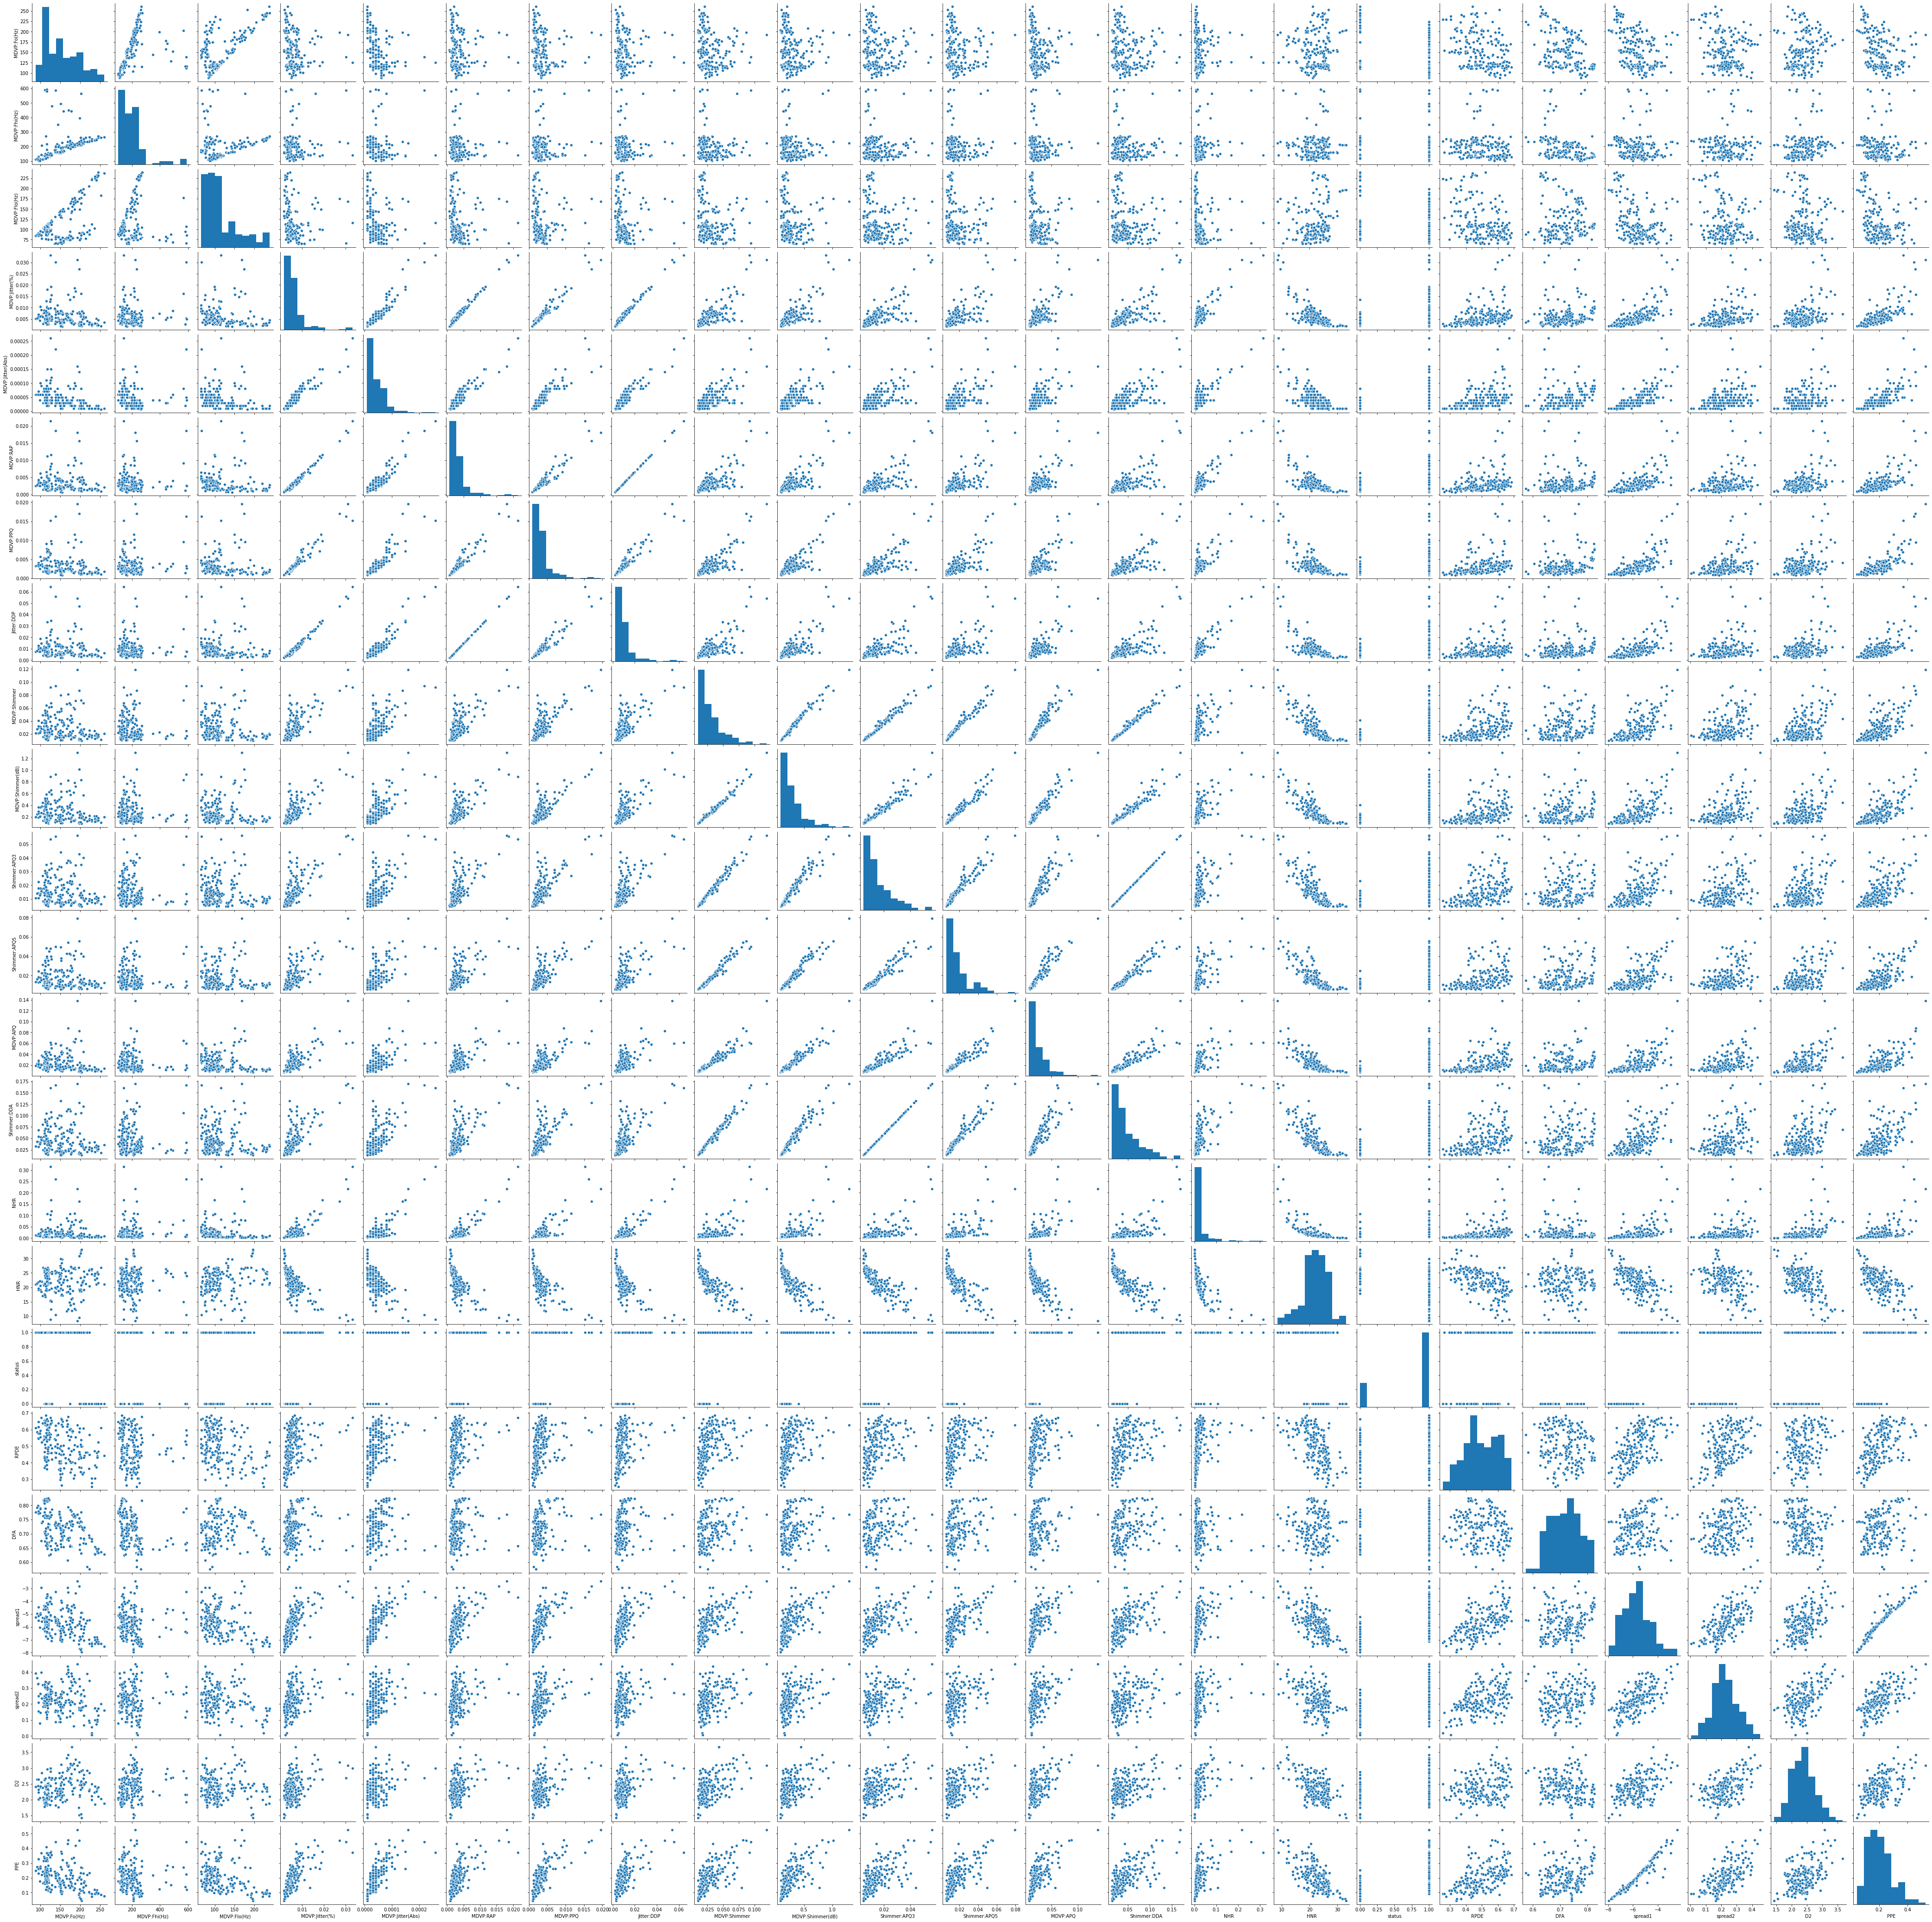

In [11]:
sns.pairplot(data)

Some of the data points are normally distributed and some are right (positively skewed). The fields almost normally distributed are D2, DFA, HNR, MDVP, PPE, RPDE, spread1, spread2.

The other fields are positively skewed

## Doing bivariant analysis by grouping the data in relation to status

### Plot histograph

status
0    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
1    [[AxesSubplot(0.125,0.758226;0.125x0.121774), ...
dtype: object

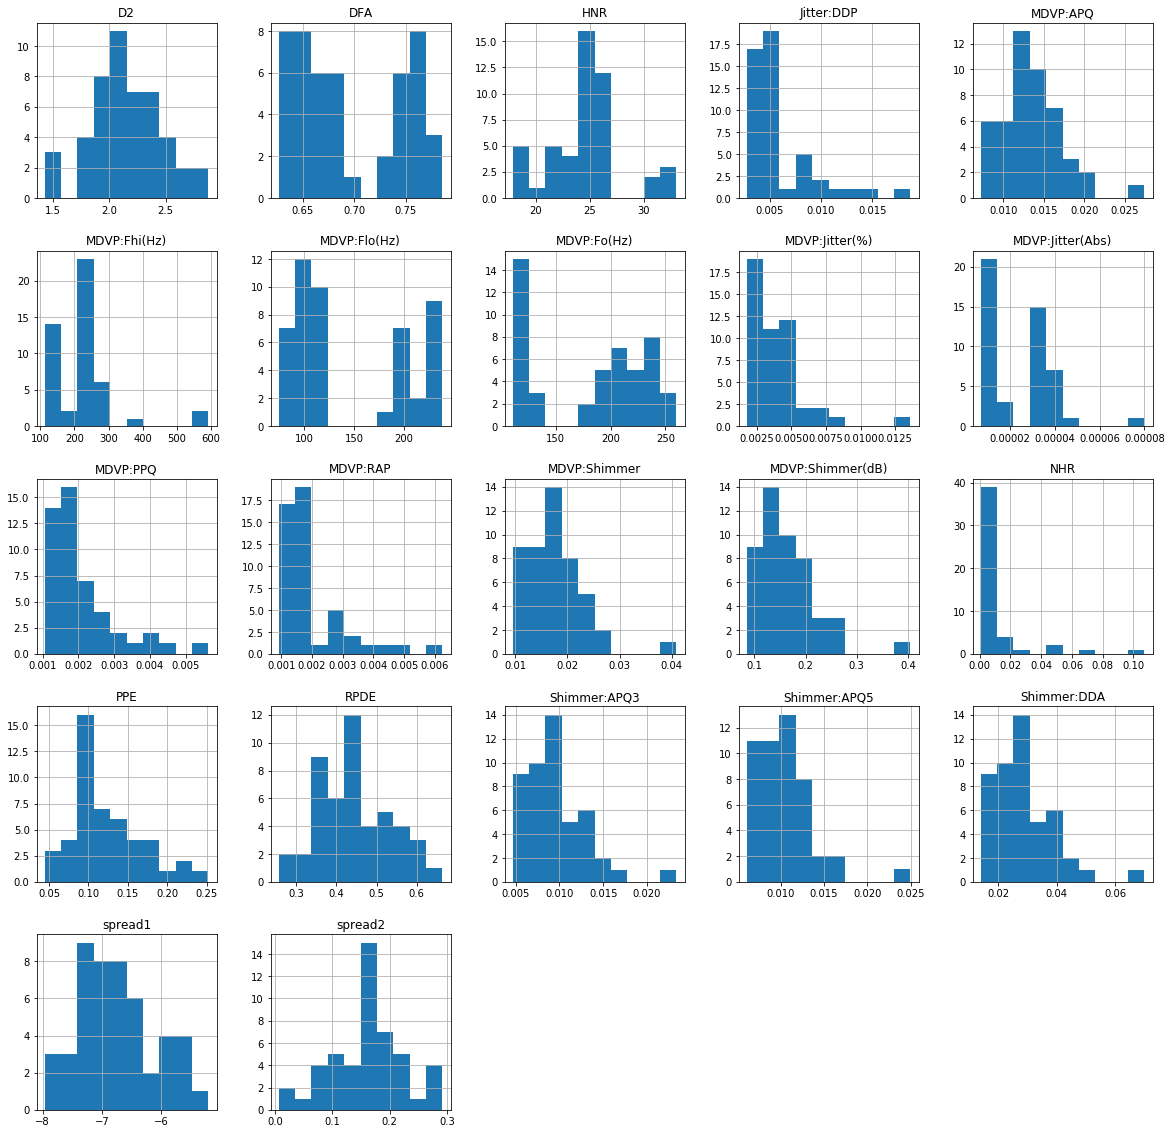

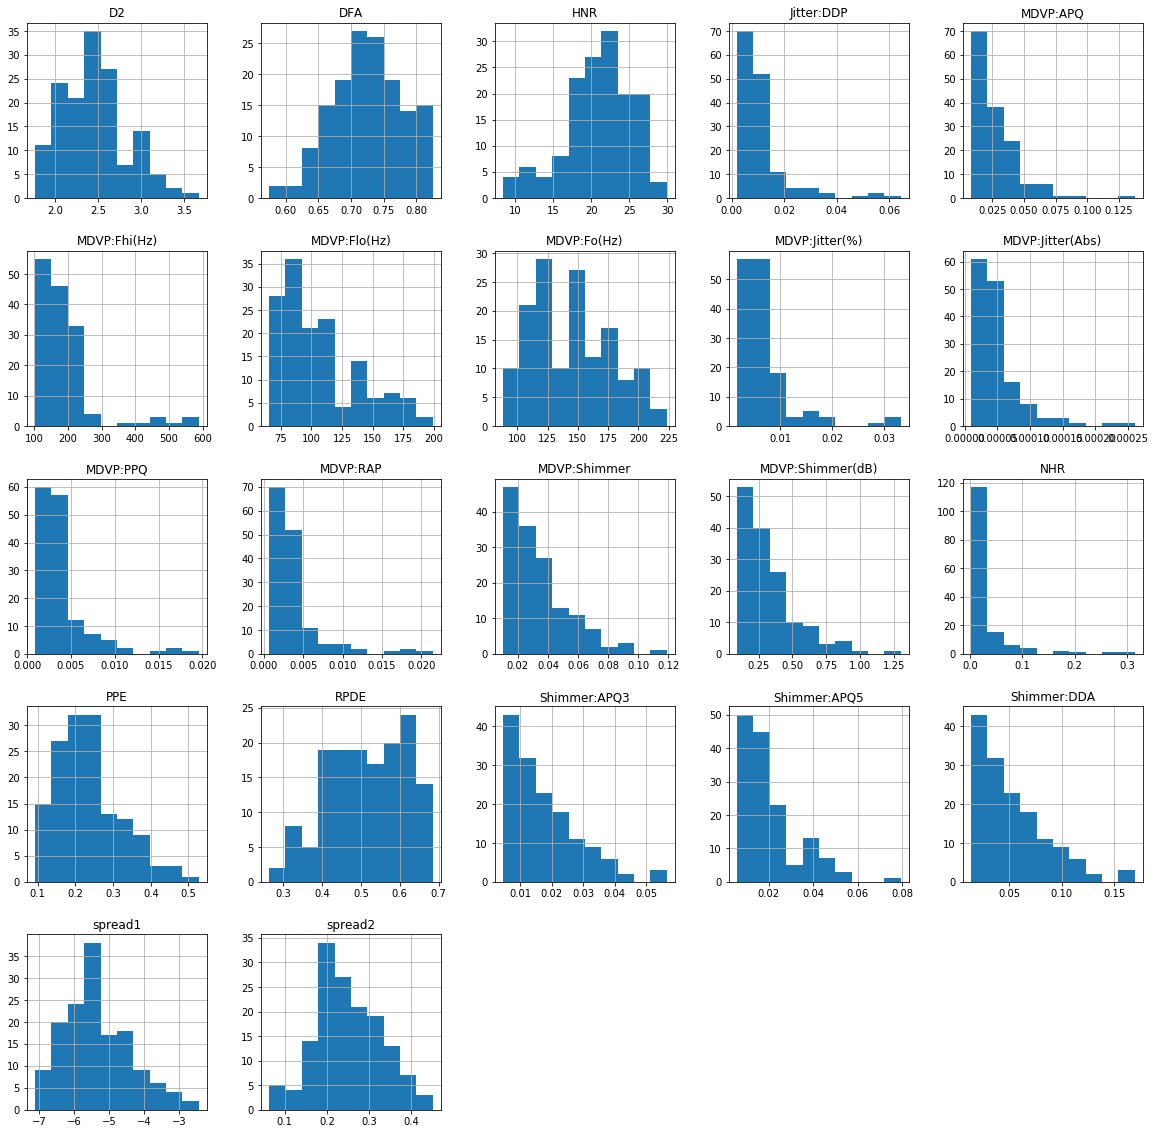

In [0]:
data.groupby('status').hist(figsize=(20,20))

### Plot SNS pair plot with hue of status to get the segregation of data in relation to positive or negative status

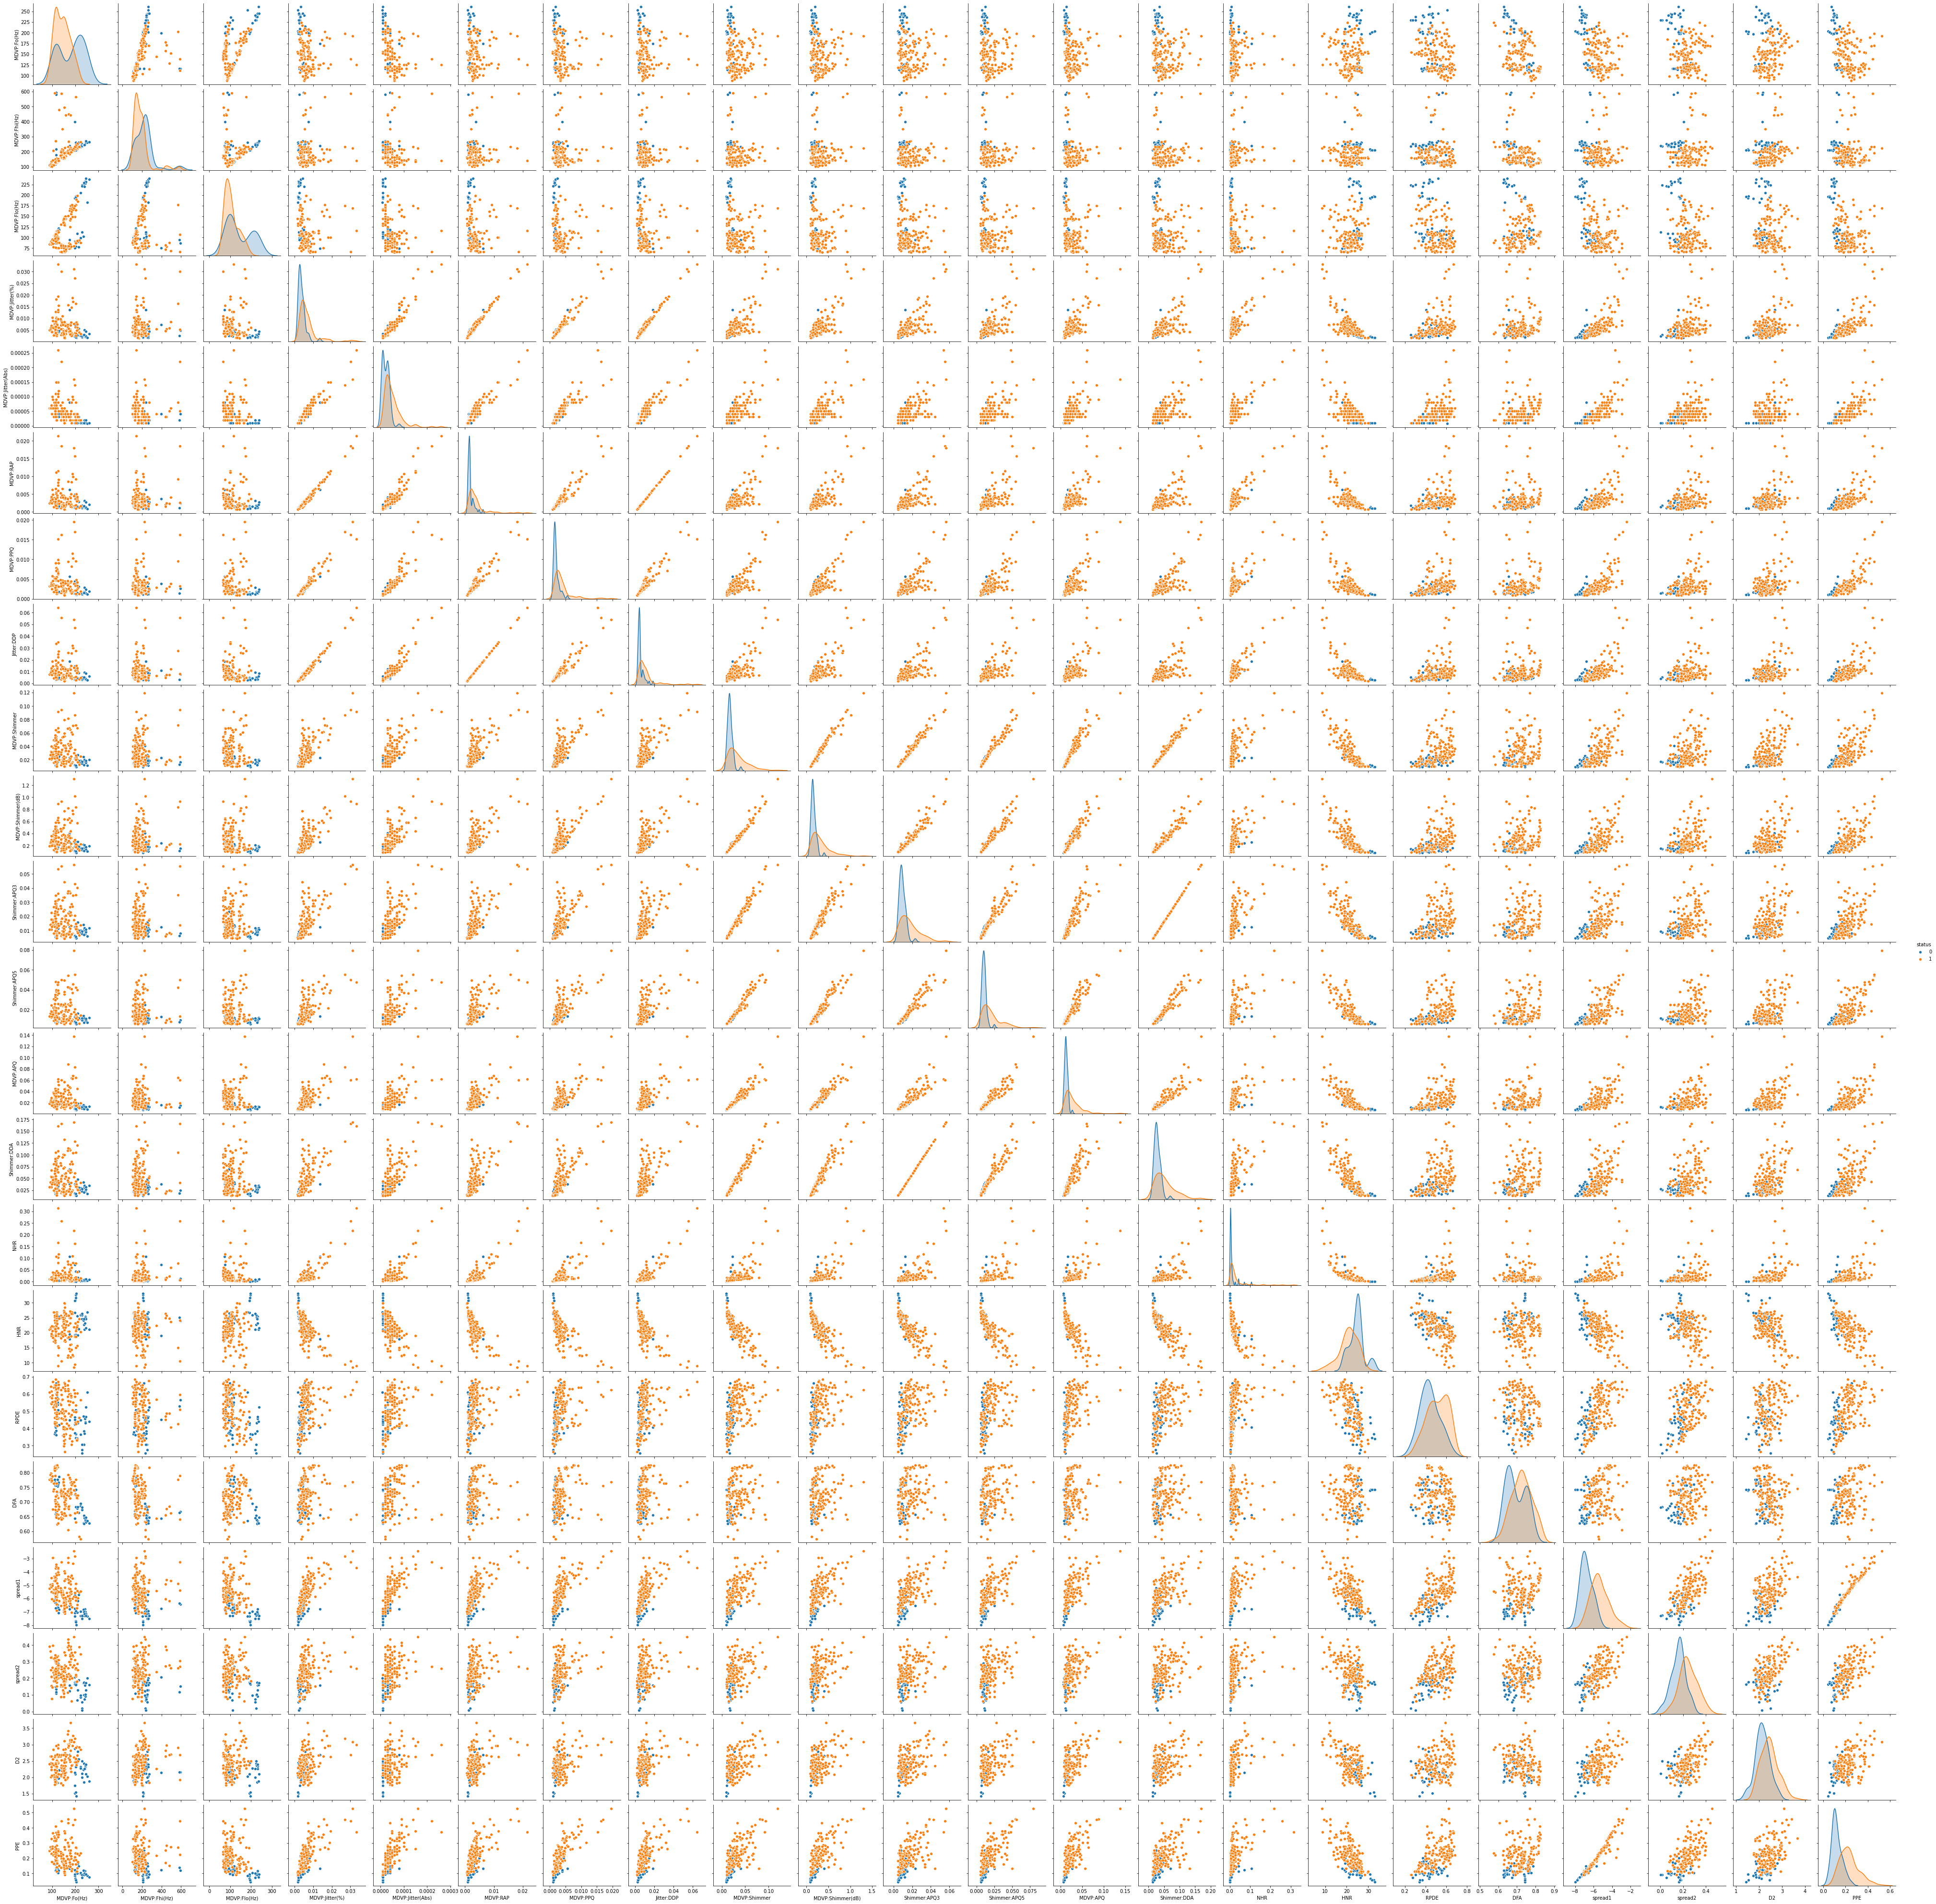

In [12]:
sns.pairplot(data, hue='status')

There are features that can be used to nicely classify the status. Some of the good featues with distinct mean of the distribution are: PPE, D2, spread 1, spread 2, HNR, MDVP-Flo, MDVP-Fhi, MDVP-Fo. Other are not so distinct but still there is some level of variation in the means for most of the features.

### Let us verify the same with box plot. 

As can be seen above PPE value of person with Parkinson's disease is significantly higher than that of a healthy person.

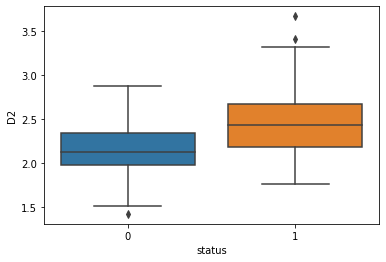

In [14]:
# Plotting status to D2
sns.boxplot(x='status', y='D2', data=data)

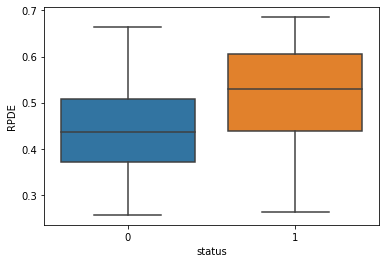

In [26]:
# Plotting status to RPDE
sns.boxplot(x='status', y='RPDE', data=data)

As can be seen above Two nonlinear dynamical complexity measures (D2, RPDE) value of person with Parkinson's disease is higher than that of healthy person but the distinction may not be as high. Let's perform t-test to confirm the same.

In [34]:
t1, p1 = stats.ttest_ind(data[data['status'] == 1]['D2'], data[data['status'] == 0]['D2'])
t2, p2 = stats.ttest_ind(data[data['status'] == 1]['RPDE'], data[data['status'] == 0]['RPDE'])
print("t for D2= " + str(t1))
print("t for RPDE= " + str(t2))

t for D2= 5.026520865711545
t for RPDE= 4.506667217991579


As confirmed from the t-test the value RPDE mean is not significantly different since its less than alpha of 5% hence RPDE may not be a good feature on the other hand D2 is just above alpha signifying that it could be a ditinguishing feature for healthy to a person with Parkinson's disease.

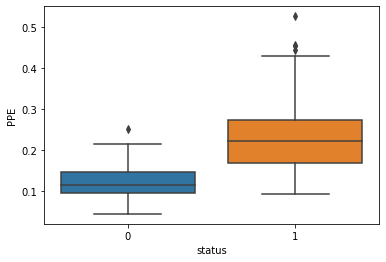

In [13]:
# Plotting status to PPE
sns.boxplot(x='status', y='PPE', data=data)

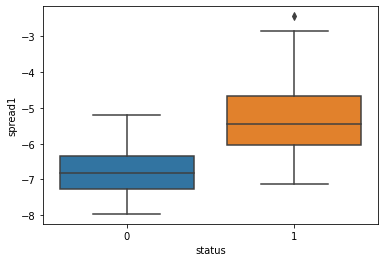

In [15]:
# Plotting status to spread1
sns.boxplot(x='status', y='spread1', data=data)

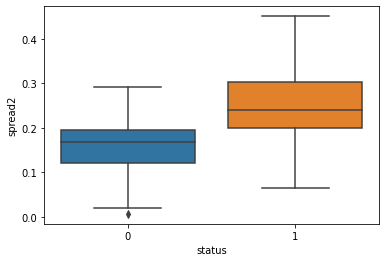

In [16]:
# Plotting status to spread2
sns.boxplot(x='status', y='spread2', data=data)

As per above graph the spread1 and spread2 and PPE values of person with Parkinson's disease is higher than normal one. It is significantly different (higer) for normal and diseased individual.

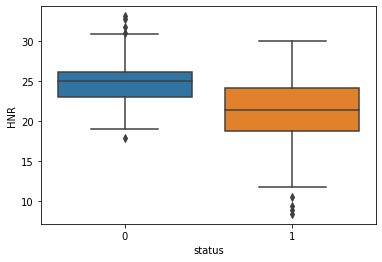

In [17]:
# Plotting status to HNR
sns.boxplot(x='status', y='HNR', data=data)

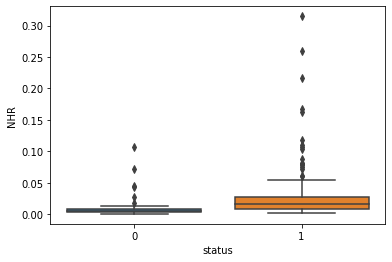

In [23]:
# Check the box plot model for NHR 
sns.boxplot(x='status', y='NHR', data=data)

As per above plot the HNR of a healthy individual is much higher as compared to one with Parkinson's disease though the spread of HNR for a person with disease is much higher on the other hand the NRH is lower. The spread of NRH for healthy individual is very low as compared to that with diseased.

Since the means seems to be close visually lets do a t-test to confirm.

In [35]:
t1, p1 = stats.ttest_ind(data[data['status'] == 1]['HNR'], data[data['status'] == 0]['HNR'])
print("t for HNR= " + str(t1))

t for HNR= -5.3866434200444795


AS confirmed from the t-test the means are significantly apart as the t-value is lower that the significant limit.

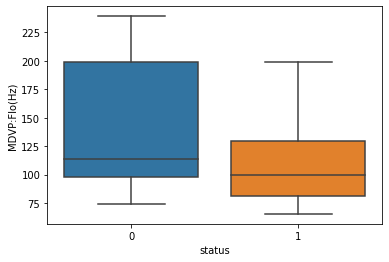

In [19]:
# Plotting status to MDVP:Flo(Hz)
sns.boxplot(x='status', y='MDVP:Flo(Hz)', data=data)

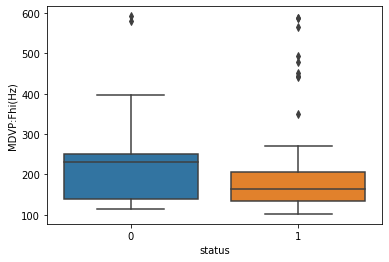

In [20]:
# Plotting status to MDVP:Fhi(Hz)
sns.boxplot(x='status', y='MDVP:Fhi(Hz)', data=data)

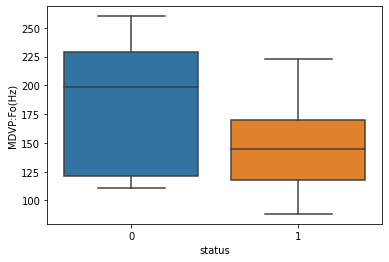

In [21]:
# Plotting status to MDVP:Fo(Hz)
sns.boxplot(x='status', y='MDVP:Fo(Hz)', data=data)

As per above graphs the Minimum vocal fundamental frequency and Maximum vocal fundamental frequency and Average vocal fundamental frequency are relatively higher for healthy individual that one with disease though there is a significant overlapping specially in case of Average vocal fundamental frequency. This can be an ok feature for classification but not as good as other features above.

Let's perform t-test to confirm the observations

In [36]:
t1, p1 = stats.ttest_ind(data[data['status'] == 1]['MDVP:Flo(Hz)'], data[data['status'] == 0]['MDVP:Flo(Hz)'])
t2, p2 = stats.ttest_ind(data[data['status'] == 1]['MDVP:Fhi(Hz)'], data[data['status'] == 0]['MDVP:Fhi(Hz)'])
t3, p3 = stats.ttest_ind(data[data['status'] == 1]['MDVP:Fo(Hz)'], data[data['status'] == 0]['MDVP:Fo(Hz)'])
print("t for MDVP:Flo(Hz)= " + str(t1))
print("t for MDVP:Fhi(Hz)= " + str(t2))
print("t for MDVP:Fo(Hz)= " + str(t3))

t for MDVP:Flo(Hz)= -5.71076835971258
t for MDVP:Fhi(Hz)= -2.3405672508312865
t for MDVP:Fo(Hz)= -5.769452074779698


As per the observations and confirmed via the t-test the Maximum vocal fundamental frequency is not a distinguishing factor for healthy and a person with Parkinson's. The other 2 features have a significant difference hence can be used as distingusing factor.

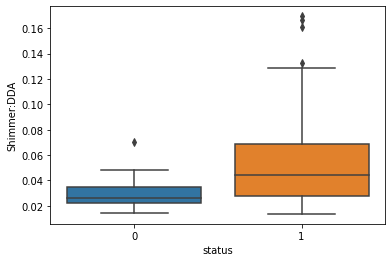

In [25]:
# Plotting status to Shimmer:DDP
sns.boxplot(x='status', y='Shimmer:DDA', data=data)

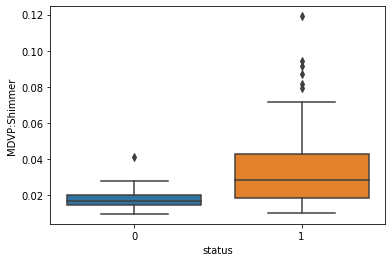

In [37]:
# Plotting status to MDVP:Shimmer
sns.boxplot(x='status', y='MDVP:Shimmer', data=data)

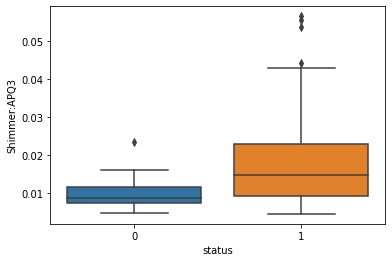

In [38]:
# Plotting status to Shimmer:APQ3
sns.boxplot(x='status', y='Shimmer:APQ3', data=data)

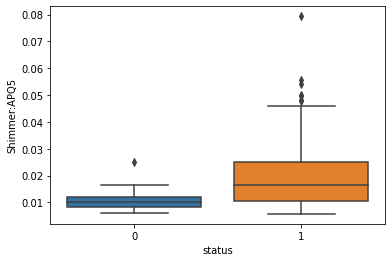

In [39]:
# Plotting status to Shimmer:APQ5
sns.boxplot(x='status', y='Shimmer:APQ5', data=data)

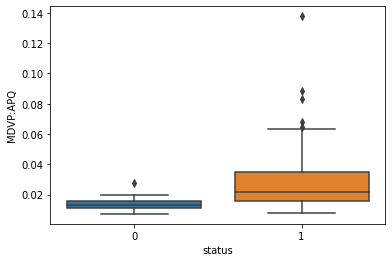

In [40]:
# Plotting status to MDVP:APQ
sns.boxplot(x='status', y='MDVP:APQ', data=data)

As evident from the above plots the "Several measures of variation in amplitude" factors are relatively nice distinguishing factor for a healthy and one with Parkinson's disease with mean of diseased person significantly higher that the healthy person

As an observation for all the factors we can conclude that most of the features have some classification bonding may be not so strong but most of the features can be used for modelling.

# Split the dataset into training and test set in the ratio of 70:30 (Training:Test)

In [0]:
#Break data into training and testing set in 70:30
X=data.drop('status',axis=1)
y=data['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=1)

# Create the model using “entropy” method of reducing the entropy and fit it to training data

Create a decision tree classifier

In [0]:
clf=DecisionTreeClassifier(criterion='entropy')
clf=clf.fit(X_train,y_train)

In [13]:
# Print the model
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# Print the feature importances
clf.feature_importances_

array([0.2191499 , 0.0998003 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.10599956, 0.        , 0.        , 0.        , 0.        ,
       0.04073417, 0.        , 0.06764433, 0.        , 0.        ,
       0.07940902, 0.38726272])

In [0]:
# Use the model to predict the test.
predictions = clf.predict(X_test)

In [16]:
# Print the predictions
predictions

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [17]:
# Print the ac=curacy of the model
metrics.accuracy_score(y_test, predictions)

0.8983050847457628

In [18]:
# Print the crosstab of test v/s prediction
pd.crosstab(index=y_test, columns=predictions)

col_0    0   1
status        
0       14   5
1        1  39

If we check theer 14 false correctly identified and 39 true correctly identified by the model. It made 6 predictions incorrectly.

# Use regularization parameters of max_depth, min_sample_leaf to recreate the model.


Defining hyperparameters and finding the optimal values of the paramters by looping to find the best possible model



In [0]:
# Define the accuracy function.
def checkAccuracy(clf):
    clf=clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    return metrics.accuracy_score(y_test, predictions)

In [0]:
from hyperopt import fmin, tpe, hp, STATUS_OK,Trials

In [0]:
#  Use max_depth and min_samples_leaf as hyper parameter for model tuning.
space ={
    'max_depth':hp.quniform('max_depth',1,20,1),
    'min_samples_leaf': hp.quniform('min_samples_leaf',1,10,1)
}

In [0]:
# Define the score abd loss function.
def score(params):
    params['max_depth']=int(params['max_depth'])
    params['min_samples_leaf']=int(params['min_samples_leaf'])
    clf = DecisionTreeClassifier(**params, criterion='entropy')
    return {'loss':1-checkAccuracy(clf),'status':STATUS_OK}

In [0]:
trials=Trials()

In [84]:
# Analysing the best model.
best=fmin(score,space,algo=tpe.suggest,trials=trials,max_evals=250)

100%|██████████| 250/250 [00:05<00:00, 45.81it/s, best loss: 0.0847457627118644]


In [85]:
print(best)

{'max_depth': 10.0, 'min_samples_leaf': 4.0}


The best parameters are:


*   max_depth 10
*   min_samples_leaf 4



Creating final model out of the best parameters

In [0]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4)
clf=clf.fit(X_train,y_train)

In [0]:
predictions = clf.predict(X_test)

In [88]:
metrics.accuracy_score(y_test, predictions)

0.9152542372881356

The model works at a much higer accuracy of 91.5%

Regularization helped in finding the best fit model.

# Next implement the decision tree using Random Forest

Run a loop to identify the best possible model using the random forest model.

In [0]:
# Parameters for the rsndom forest
spaceRandomForest = {
    'n_estimators':hp.quniform('n_estimators',100,1000,1),
    'max_depth':hp.quniform('max_depth',1,20,1),
    'max_leaf_nodes': hp.quniform('max_leaf_nodes',5,100,1),
    'min_samples_split': hp.quniform('min_samples_split',2,100,1)
}

In [0]:
# Define the score function for the random forest.
def scoreRandomForest(params):
    params['n_estimators']=int(params['n_estimators'])
    params['min_samples_split']=int(params['min_samples_split'])
    params['max_leaf_nodes']=int(params['max_leaf_nodes'])
    clf = RandomForestClassifier(**params)
    return {'loss':1-checkAccuracy(clf),'status':STATUS_OK}

In [0]:
trialsRandomForest=Trials()

In [53]:
# Find the best =model
best=fmin(scoreRandomForest,spaceRandomForest,algo=tpe.suggest,trials=trialsRandomForest,max_evals=250)

100%|██████████| 250/250 [02:50<00:00,  1.47it/s, best loss: 0.13559322033898302]


In [54]:
print(best)

{'max_depth': 14.0, 'max_leaf_nodes': 98.0, 'min_samples_split': 3.0, 'n_estimators': 158.0}


The best model identified by the search logic is as:

*   max_depth 14
*   max_leaf_nodes 98 
*   min_samples_split 3
*   n_estimators 158





In [0]:
rfcl = RandomForestClassifier(n_estimators = 158, max_depth=14, max_leaf_nodes=98, min_samples_split= 3)
rfcl = rfcl.fit(X_train, y_train)

0.864406779661017


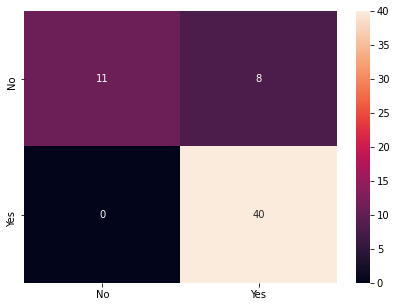

In [56]:
y_predict = rfcl.predict(X_test)
print('Accuracy score', rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

Optimal number of trees is 158.